In [58]:
# Import essential libraries for data manipulation, visualization, clustering, scaling, and dimensionality reduction.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [59]:
# 1. Data Loading Section
# Explanation: Load the final merged dataset for clustering analysis.
final_df = pd.read_csv('/Users/atrabaja/Documents/FinMark_DataMining/Final_Merged_Dataset.csv')
print("Dataset loaded successfully. Shape:", final_df.shape)
print(final_df.head())

Dataset loaded successfully. Shape: (1000, 10)
   Customer_ID  Satisfaction_Score  Feedback_Comments  \
0            1                10.0     Very satisfied   
1            2                 3.0     Very satisfied   
2            3                10.0     Very satisfied   
3            4                 7.0  Needs improvement   
4            5                 8.0     Unsatisfactory   

   Likelihood_to_Recommend  Customer_Loyalty_Score  Sentiment_Score  \
0                        9                     9.5             0.65   
1                        3                     3.0             0.65   
2                        1                     5.5             0.65   
3                        4                     5.5             0.00   
4                        7                     7.5             0.00   

   Total_Transaction_Amount  Average_Transaction_Amount  \
0                   16836.0                      2806.0   
1                    4907.0                      2453.5   
2     

In [60]:
# 2. Feature Selection Section
# Explanation: Select relevant features for clustering based on variation and correlation analysis.
features = final_df[['Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Frequency', 'Customer_Loyalty_Score', 'Sentiment_Score']]
print("Selected features for clustering:")
print(features.head())

# Insights: These features provide a mix of spending behavior, engagement frequency, loyalty, and customer sentiment, which are essential for meaningful clustering.

Selected features for clustering:
   Total_Transaction_Amount  Average_Transaction_Amount  \
0                   16836.0                      2806.0   
1                    4907.0                      2453.5   
2                    1538.0                      1538.0   
3                    8295.0                      4147.5   
4                   14798.0                      2959.6   

   Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
0                    6.0                     9.5             0.65  
1                    2.0                     3.0             0.65  
2                    1.0                     5.5             0.65  
3                    2.0                     5.5             0.00  
4                    5.0                     7.5             0.00  


In [61]:
# 3. Handling Missing Values Section
# Explanation: Handle missing values using mean imputation to avoid errors in PCA and clustering.
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
print("Missing values handled. First 5 rows:")
print(pd.DataFrame(features_imputed, columns=features.columns).head())

Missing values handled. First 5 rows:
   Total_Transaction_Amount  Average_Transaction_Amount  \
0                   16836.0                      2806.0   
1                    4907.0                      2453.5   
2                    1538.0                      1538.0   
3                    8295.0                      4147.5   
4                   14798.0                      2959.6   

   Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
0                    6.0                     9.5             0.65  
1                    2.0                     3.0             0.65  
2                    1.0                     5.5             0.65  
3                    2.0                     5.5             0.00  
4                    5.0                     7.5             0.00  


In [62]:
# 4. Data Standardization Section
# Explanation: Standardize data to ensure each feature contributes equally to clustering.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)
print("Features standardized. First 5 rows:")
print(pd.DataFrame(scaled_features, columns=features.columns).head())

# Purpose: Standardizes the dataset to bring all features to the same scale (mean = 0, standard deviation = 1).
# Results: Data is transformed using StandardScaler, ensuring uniform scaling.
# Insights: Necessary because clustering algorithms like K-Means are sensitive to feature magnitude.

Features standardized. First 5 rows:
   Total_Transaction_Amount  Average_Transaction_Amount  \
0                  0.684789                    0.421872   
1                 -1.197486                   -0.047752   
2                 -1.729080                   -1.267441   
3                 -0.662894                    2.209105   
4                  0.363213                    0.626508   

   Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
0               0.448776                1.607950         0.576566  
1              -1.392691               -1.047456         0.576566  
2              -1.853057               -0.026146         0.576566  
3              -1.392691               -0.026146        -1.144526  
4              -0.011590                0.790902        -1.144526  


In [63]:
# 5. Feature Correlation Analysis
# Explanation: Identify feature pairings with high correlation to understand dependencies.
correlation_matrix = pd.DataFrame(scaled_features, columns=features.columns).corr()
print("Feature correlation matrix:")
print(correlation_matrix)

# Identify feature pairs with high correlation (above 0.7)
high_corr_features = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features < 1].drop_duplicates()
print("Highly correlated feature pairs:")
print(high_corr_features[high_corr_features > 0.7])

# Purpose: Identifies correlations between variables to detect highly related features.
# Results: A correlation matrix is generated, showing relationships between variables.
# Insights: If two variables are highly correlated, one may be redundant.
# Helps in deciding whether to remove certain features before clustering.

Feature correlation matrix:
                            Total_Transaction_Amount  \
Total_Transaction_Amount                    1.000000   
Average_Transaction_Amount                  0.445870   
Transaction_Frequency                       0.858457   
Customer_Loyalty_Score                      0.041039   
Sentiment_Score                            -0.047180   

                            Average_Transaction_Amount  Transaction_Frequency  \
Total_Transaction_Amount                      0.445870               0.858457   
Average_Transaction_Amount                    1.000000              -0.008078   
Transaction_Frequency                        -0.008078               1.000000   
Customer_Loyalty_Score                        0.046366               0.020399   
Sentiment_Score                              -0.029112              -0.037065   

                            Customer_Loyalty_Score  Sentiment_Score  
Total_Transaction_Amount                  0.041039        -0.047180  
Average_

In [64]:
# 6. Dimensionality Reduction Section
# Explanation: Use PCA to reduce the dataset to key components while retaining maximum variance.
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
print("PCA applied. Explained variance ratio:", pca.explained_variance_ratio_)
print("First 5 PCA transformed features:")
print(pd.DataFrame(pca_features, columns=['PCA1', 'PCA2']).head())

# Purpose: Applies Principal Component Analysis (PCA) to reduce feature dimensions while retaining maximum variance.
# Results: Reduces the dataset from 5 to 2 principal components.
# The explained variance ratio shows how much variance is captured by these components.
# Insights: Reducing dimensions makes visualization easier while preserving essential patterns.
# PCA ensures that the most critical information is retained.

PCA applied. Explained variance ratio: [0.39443926 0.21020545]
First 5 PCA transformed features:
       PCA1      PCA2
0  0.957194  0.787309
1 -1.833521 -0.497876
2 -2.827637 -0.248287
3 -0.543755  2.078247
4  0.580077  1.369739


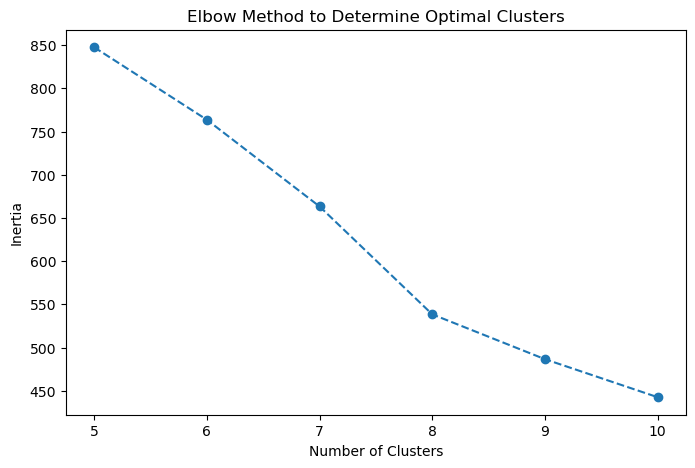

Elbow method applied. Observe the plot to identify the optimal cluster count.


In [65]:
# 7. Elbow Method for Optimal Clusters
# Explanation: Determine the ideal number of clusters using the Elbow method (range 5 to 10).
inertia = []
k_values = range(5, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()
print("Elbow method applied. Observe the plot to identify the optimal cluster count.")

# Purpose: Determines the best number of clusters by plotting inertia values (sum of squared distances within clusters).
# Results: The Elbow Method Plot is generated for clusters ranging from 5 to 10.
# The optimal cluster count is identified by observing where the inertia curve starts to flatten.
# Insights: The point where adding more clusters provides diminishing returns is the best choice.
# It suggests choosing an optimal K value based on the plot.

In [66]:
# 8. K-Means Clustering Section
# Explanation: Apply K-Means clustering with the optimal number of clusters from the Elbow method.
optimal_k = 5  # Adjust based on the elbow method observation
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_df['Cluster_KMeans'] = kmeans.fit_predict(pca_features)
print(f"K-Means clustering applied with {optimal_k} clusters. Cluster distribution:")
print(final_df['Cluster_KMeans'].value_counts())
print("First 5 rows with cluster assignments:")
print(final_df[['Cluster_KMeans']].head())

# Purpose: Applies K-Means clustering with the optimal number of clusters.
# Results: Assigns each customer to one of the clusters.
# Displays cluster distribution (number of customers per cluster).
# Insights: Helps in segmenting customers based on spending patterns, loyalty, and sentiment.
# Cluster size distribution gives an idea of segment dominance

K-Means clustering applied with 5 clusters. Cluster distribution:
Cluster_KMeans
3    267
0    238
2    195
4    162
1    138
Name: count, dtype: int64
First 5 rows with cluster assignments:
   Cluster_KMeans
0               4
1               2
2               2
3               0
4               4


In [67]:
# 9. Cluster Comparison Section
# Explanation: Compare clusters to identify the most distinct group in terms of behavior.
cluster_summary = final_df.groupby('Cluster_KMeans')[['Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Frequency', 'Customer_Loyalty_Score', 'Sentiment_Score']].mean()
print("Cluster characteristic comparison:")
print(cluster_summary)

# Purpose: Analyzes differences between clusters by computing average feature values per cluster.
# Results: A comparison table displaying the mean values for Total_Transaction_Amount, Average_Transaction_Amount, Transaction_Frequency, Customer_Loyalty_Score, and Sentiment_Score across clusters.
# Insights: Helps identify clusters with the highest spending customers, most frequent buyers, and those with high sentiment scores.
# Allows businesses to target high-value customer groups.

Cluster characteristic comparison:
                Total_Transaction_Amount  Average_Transaction_Amount  \
Cluster_KMeans                                                         
0                            8539.330508                 2719.803703   
1                           22618.695652                 2697.971638   
2                            5210.748718                 1718.704615   
3                           13198.893130                 2381.715709   
4                           17270.253086                 3077.571172   

                Transaction_Frequency  Customer_Loyalty_Score  Sentiment_Score  
Cluster_KMeans                                                                  
0                            3.377119                6.422269         0.258613  
1                            8.485507                4.920290         0.496739  
2                            3.056410                4.764103         0.581538  
3                            5.683206                4.

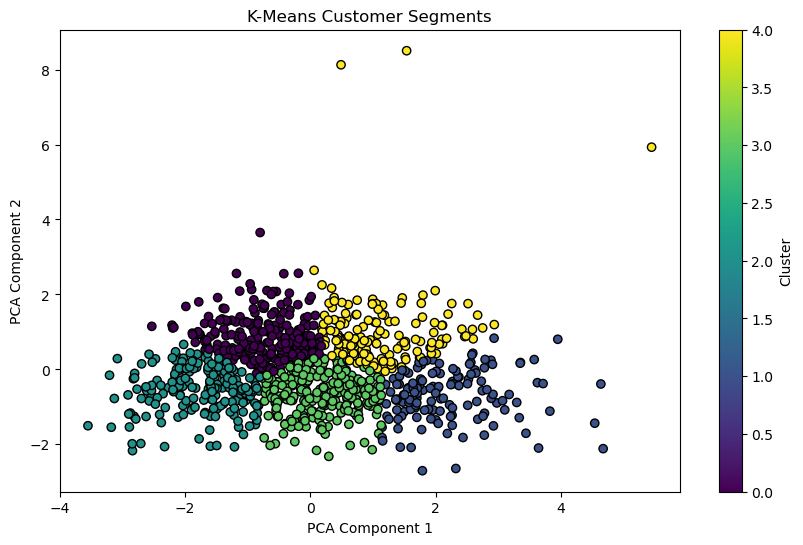

K-Means clusters visualized using PCA-reduced dimensions.


In [68]:
# 10. Visualization of Clusters
# Explanation: Visualize customer segmentation using PCA components.
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=final_df['Cluster_KMeans'], cmap='viridis', edgecolors='k')
plt.title('K-Means Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
print("K-Means clusters visualized using PCA-reduced dimensions.")

# Purpose: Displays K-Means clusters using PCA components.
# Results: A scatter plot is generated where each point represents a customer, colored by their assigned cluster.
# Color legend helps in distinguishing cluster groupings.
# Insights: Helps in understanding how well clusters are separated.
# A good clustering result should show clear and distinct clusters with minimal overlap.

In [69]:
# 11. Recommendation Section
# Explanation: Provide insights into the best-performing customer segment for business action.
best_cluster = cluster_summary.idxmax().to_dict()
print("Recommended customer cluster based on highest values per feature:")
print(best_cluster)

# Purpose: Provides actionable insights based on cluster characteristics.
# Results: Identifies the best-performing cluster based on the highest values in each feature.
# Displays a dictionary mapping features to the best cluster.
# Insights: Helps businesses identify which segment to focus on for loyalty programs, promotions, and retention strategies.

Recommended customer cluster based on highest values per feature:
{'Total_Transaction_Amount': 1, 'Average_Transaction_Amount': 4, 'Transaction_Frequency': 1, 'Customer_Loyalty_Score': 4, 'Sentiment_Score': 3}


In [70]:
# Final Takeaway
# The Elbow Method helped determine the optimal number of clusters.
# K-Means clustering successfully grouped customers based on spending behavior and sentiment.
# Cluster comparison provides actionable insights for business strategies.
# The best-performing customer segment was identified, aiding targeted marketing efforts.